In [19]:
pip install statsmodels


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/Users/ccjiang/Downloads/kc_house_data.csv')

In [3]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [85]:
# House Age
df['house_age'] = df['date'].dt.year - df['yr_built']

# Renovation Age
df['renov_age'] = df['date'].dt.year - df['yr_renovated']
df['renov_age'] = df['renov_age'].where(df['yr_renovated'] != 0, df['house_age'])

# Price per Square Foot
df['price_per_sqft'] = df['price'] / df['sqft_living']

# Room Ratio
df['room_ratio'] = df['bedrooms'] / df['bathrooms']

# Is Renovated
df['is_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

# Interaction Features
df['sqft_living_grade'] = df['sqft_living'] * df['grade']


In [88]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,year,house_age,renov_age,price_per_sqft,room_ratio,is_renovated,sqft_living_grade
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,-122.257,1340,5650,2014,59,59,188.050847,3.000000,0,8260
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,-122.319,1690,7639,2014,63,23,209.338521,1.333333,1,17990
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,-122.233,2720,8062,2015,82,82,233.766234,2.000000,0,4620
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,-122.393,1360,5000,2014,49,49,308.163265,1.333333,0,13720
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,-122.045,1800,7503,2015,28,28,303.571429,1.500000,0,13440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,-122.346,1530,1509,2014,5,5,235.294118,1.200000,0,12240
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,-122.362,1830,7200,2015,1,1,173.160173,1.600000,0,18480
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,-122.299,1020,2007,2014,5,5,394.216667,2.666667,0,7140
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,-122.069,1410,1287,2015,11,11,250.000000,1.200000,0,12800


In [86]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)


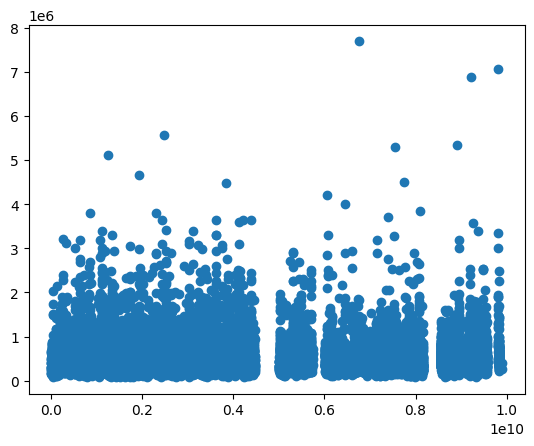

In [87]:
plt.scatter(df['id'],df['price'])

In [90]:
X = df.drop('price', axis=1)  # Assuming 'price' is your target variable
y = df['price']

In [91]:
results = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront\
              + view + condition + grade + sqft_above + sqft_basement + yr_built + \
              yr_renovated + lat + long + sqft_living15 + sqft_lot15 ", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3082.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:08:07   Log-Likelihood:            -2.9476e+05
No. Observations:               21613   AIC:                         5.895e+05
Df Residuals:                   21596   BIC:                         5.897e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.686e+07    1.6e+06    -23.105

In [26]:
"y_hat = -3.686e+07 -3.415e+04bedrooms + 4.216e+04bathrooms + 108.7230sqft_living\
    + 0.1274sqft_lot + 760.6881floors + 5.878e+05waterfront + 4.943e+04view\
        + 3.103e+04condition + 9.722e+04grade + 70.7908sqft_above + 37.9321sqft_basement - 2456.2763yr_built\
            + 21.5324yr_renovated + 5.611e+05lat - 1.17e+05long + 27.4312sqft_living15 - 0.3933sqft_lot15"

'y_hat = -3.686e+07 -3.415e+04bedrooms + 4.216e+04bathrooms + 108.7230sqft_living    + 0.1274sqft_lot + 760.6881floors + 5.878e+05waterfront + 4.943e+04view        + 3.103e+04condition + 9.722e+04grade + 70.7908sqft_above + 37.9321sqft_basement - 2456.2763yr_built            + 21.5324yr_renovated + 5.611e+05lat - 1.17e+05long + 27.4312sqft_living15 - 0.3933sqft_lot15'

In [28]:
 -3.686e+07 -3.415e+04*3 + 4.216e+04*1 + 108.7230*1180+ 0.1274*5650\
      + 760.6881*1.0 + 5.878e+05*0 + 4.943e+04*0 + 3.103e+04*3 + 9.722e+04*7 + 70.7908*1180 + 37.9321*0 - 2456.2763*1955\
      + 21.5324*0 + 5.611e+05*47.5112 - 1.17e+05*(-122.257) + 27.4312*1340 - 0.3933*5650

261765.59860000512

In [30]:
pred_vals = results.predict(df[['bedrooms','bathrooms','sqft_living', 'sqft_lot','floors','waterfront',
                               'view','condition','grade','sqft_above','sqft_basement','yr_built',
                               'yr_renovated','lat','long','sqft_living15','sqft_lot15']])

In [31]:
pred_vals


0        259819.493989
1        736346.524150
2        339033.819354
3        479633.873737
4        456995.413886
             ...      
21608    474208.787190
21609    469679.878202
21610    166532.272396
21611    370373.631714
21612    169040.955645
Length: 21613, dtype: float64

In [32]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [33]:
res

,y_hat,price
0,259819.493989,221900.0
1,736346.524150,538000.0
2,339033.819354,180000.0
3,479633.873737,604000.0
4,456995.413886,510000.0
...,...,...
21608,474208.787190,360000.0
21609,469679.878202,400000.0
21610,166532.272396,402101.0
21611,370373.631714,400000.0


In [34]:
res['error'] = res['y_hat'] - res['price']

In [35]:
res.head()

,y_hat,price,error
0,259819.493989,221900.0,37919.493989
1,736346.524150,538000.0,198346.524150
2,339033.819354,180000.0,159033.819354
3,479633.873737,604000.0,-124366.126263
4,456995.413886,510000.0,-53004.586114


In [36]:
res['sq_error'] = res['error']**2

In [37]:
np.sqrt(res['sq_error'].mean())

202610.7598559713

In [38]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616


(array([3.0000e+00, 1.0000e+00, 2.0000e+00, 5.0000e+00, 1.6000e+01,
        7.5000e+01, 4.0000e+02, 1.6795e+04, 4.2890e+03, 2.7000e+01]),
 array([-4346298.37578063, -3787328.50824893, -3228358.64071723,
        -2669388.77318553, -2110418.90565383, -1551449.03812213,
         -992479.17059043,  -433509.30305873,   125460.56447298,
          684430.43200468,  1243400.29953638]),
 <BarContainer object of 10 artists>)

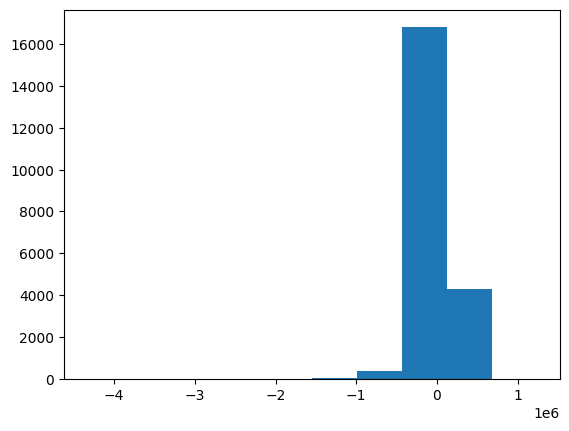

In [39]:
plt.hist(res['error'])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

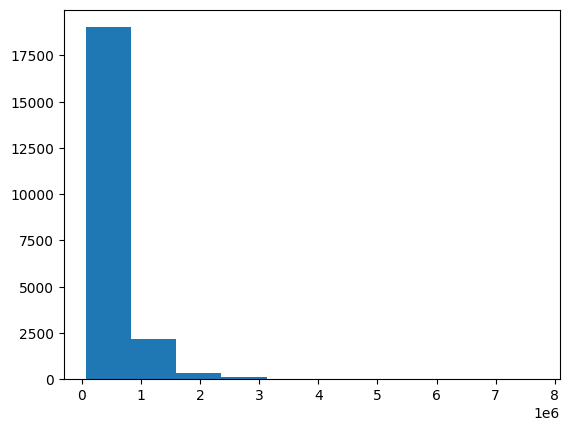

In [41]:
plt.hist(df['price'])

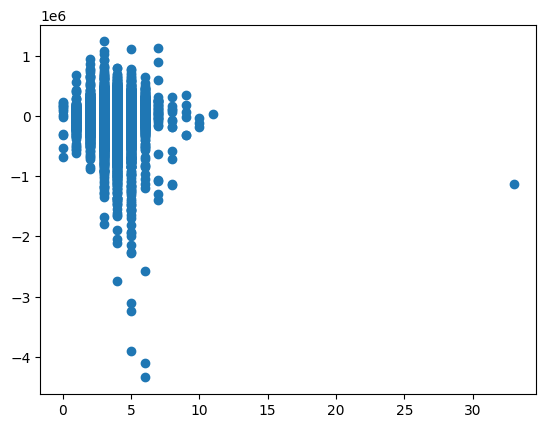

In [40]:
plt.scatter(df['bedrooms'],res['error'])

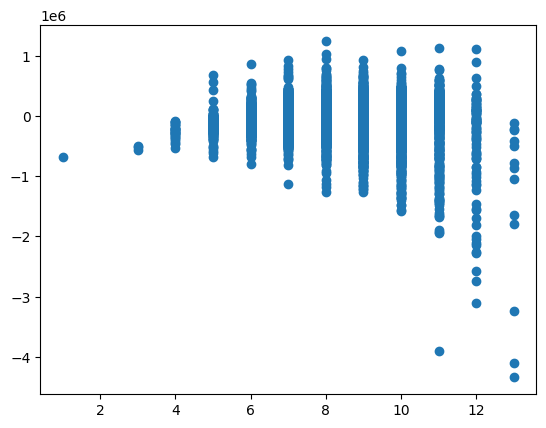

In [42]:
plt.scatter(df['grade'],res['error'])

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-4346298.37578063, -4103098.44456712, -3914058.31074846, ...,
          1123693.36560882,  1131884.99966348,  1243400.29953638])),
 (180354.50894089794, 3.2725749139712296e-07, 0.889994219911846))

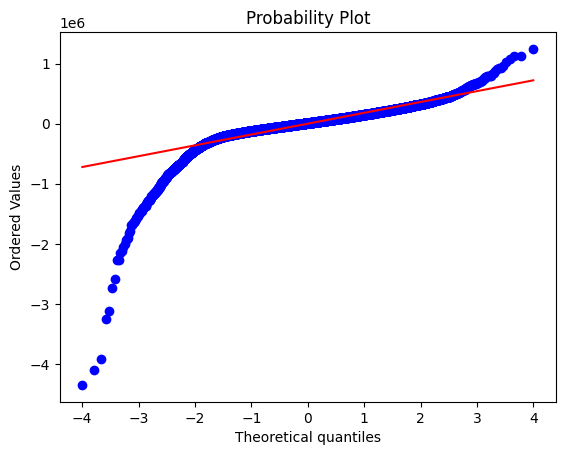

In [43]:
# comparing to normal distrubution
import scipy.stats as stats
fig = plt.figure()
ax= fig.add_subplot(111)

stats.probplot(res['error'], dist ='norm', plot=ax)

In [47]:
infl= results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_bathrooms  dfb_sqft_living   
0          -0.000191     -0.000596       0.001170         0.000480  \
1           0.006905      0.006215       0.004233        -0.011964   
2           0.002469      0.003919      -0.001494         0.006932   
3          -0.004391      0.000651       0.008474        -0.001746   
4           0.001597     -0.000131       0.000713        -0.001399   
...              ...           ...            ...              ...   
21608       0.004103     -0.000338       0.000405         0.001747   
21609       0.004333     -0.001678       0.000914        -0.000315   
21610      -0.007664     -0.003080      -0.021951         0.009959   
21611       0.001260     -0.000158       0.000649        -0.000580   
21612      -0.004924     -0.002066      -0.014445         0.006758   

       dfb_sqft_lot  dfb_floors  dfb_waterfront  dfb_view  dfb_condition   
0          0.000102    0.000799       -0.000049 -0.000069       0.001136  \
1      

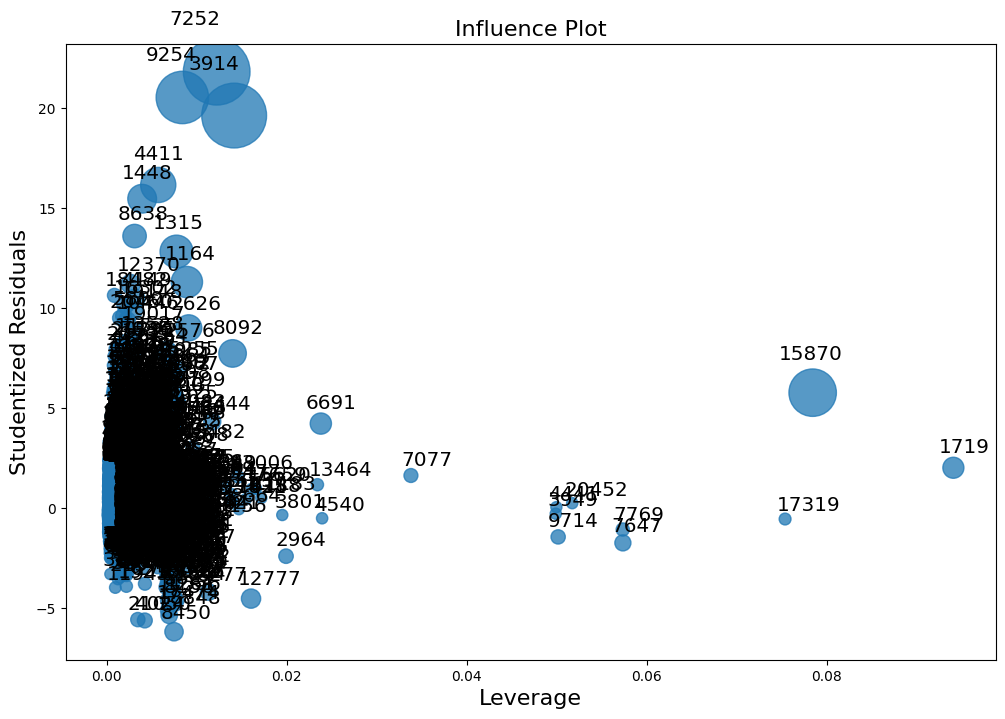

In [46]:
fig, ax= plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax,criterion='cooks')

In [48]:
res

,y_hat,price,error,sq_error
0,259819.493989,221900.0,37919.493989,1.437888e+09
1,736346.524150,538000.0,198346.524150,3.934134e+10
2,339033.819354,180000.0,159033.819354,2.529176e+10
3,479633.873737,604000.0,-124366.126263,1.546693e+10
4,456995.413886,510000.0,-53004.586114,2.809486e+09
...,...,...,...,...
21608,474208.787190,360000.0,114208.787190,1.304365e+10
21609,469679.878202,400000.0,69679.878202,4.855285e+09
21610,166532.272396,402101.0,-235568.727604,5.549263e+10
21611,370373.631714,400000.0,-29626.368286,8.777217e+08


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression , ElasticNet, Ridge, Lasso

In [52]:
df_2 = pd.read_csv('/Users/ccjiang/Downloads/kc_house_data.csv')

In [53]:
df_2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [57]:
categorical_features = ['view', 'condition', 'grade','waterfront']
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot',
                      'floors','sqft_above','sqft_basement','yr_built',
                      'yr_renovated', 'lat', 'long','sqft_living15','sqft_lot15']
target = 'price'

In [58]:
categorical_features + numerical_features

['view',
 'condition',
 'grade',
 'waterfront',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [59]:
df_2[categorical_features + numerical_features]

,view,condition,grade,waterfront,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0,3,7,0,3,1.00,1180,5650,1.0,1180,0,1955,0,47.5112,-122.257,1340,5650
1,0,3,7,0,3,2.25,2570,7242,2.0,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,0,3,6,0,2,1.00,770,10000,1.0,770,0,1933,0,47.7379,-122.233,2720,8062
3,0,5,7,0,4,3.00,1960,5000,1.0,1050,910,1965,0,47.5208,-122.393,1360,5000
4,0,3,8,0,3,2.00,1680,8080,1.0,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,3,8,0,3,2.50,1530,1131,3.0,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,0,3,8,0,4,2.50,2310,5813,2.0,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,0,3,7,0,2,0.75,1020,1350,2.0,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,0,3,8,0,3,2.50,1600,2388,2.0,1600,0,2004,0,47.5345,-122.069,1410,1287


In [61]:
X_train, X_test, y_train, y_test = train_test_split(df_2[categorical_features + numerical_features], df_2[target],
test_size = 0.3, random_state = 1234)
X_train

,view,condition,grade,waterfront,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
15026,0,3,7,0,2,1.75,1620,113862,1.5,1620,0,1995,0,47.4821,-121.719,1560,54806
7354,0,3,6,0,3,1.00,1400,10800,1.0,1400,0,1962,0,47.7190,-122.202,1430,10000
6051,0,2,7,0,2,1.00,1460,6000,1.0,1260,200,1925,0,47.7009,-122.317,1580,6380
4398,0,3,7,0,4,1.75,1620,10530,1.0,1620,0,1968,0,47.3808,-122.211,1890,9975
9298,0,3,9,0,3,2.50,2030,217805,1.0,2030,0,1999,0,47.3942,-122.515,1870,109468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,0,3,10,0,3,2.25,3360,7108,2.0,2770,590,1905,2004,47.6187,-122.284,3450,8558
9449,0,4,9,0,4,3.00,3600,9687,2.0,3600,0,1959,1995,47.6257,-122.208,2620,10400
8471,0,3,7,0,3,2.75,1710,9448,1.0,1010,700,1947,0,47.6693,-122.267,1960,8951
17048,0,5,5,0,3,1.00,1050,6240,1.0,1050,0,1948,0,47.4933,-122.338,1410,6240


In [62]:
y_train

15026     439000.0
7354      279900.0
6051      312000.0
4398      249950.0
9298      565000.0
           ...    
8222     2193000.0
9449     1698000.0
8471      515000.0
17048     208000.0
1318      234975.0
Name: price, Length: 15129, dtype: float64

In [63]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [64]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])

In [65]:
preprocessor = ColumnTransformer (transformers= [('cat', cat_transformer, categorical_features),
                                                ('num',num_transformer, numerical_features)])

In [66]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [67]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'condition', 'grade',
                                                   'waterfront']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', LinearRegression())])

In [68]:
pred = linear_regression.predict(X_test)
pred

array([ 458112.,  424960., 1166592., ...,  411008.,  535680.,  445696.])

In [69]:
from sklearn.metrics import mean_squared_error

In [70]:
np.sqrt(mean_squared_error(pred, y_test))

5394854123174260.0

In [71]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
    ])


In [72]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'condition', 'grade',
                                                   'waterfront']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', Ridge(alpha=3.0))])

In [73]:
pred_ridge = ridge_regression.predict(X_test)

In [112]:
coefficients = ridge_model.coef_
coefficients


array([ 4.95024846e+04,  3.23847825e+04,  9.72823295e+04,  6.05547660e+05,
       -3.43243186e+04,  4.07452109e+04,  1.09677401e+02,  8.46528327e-02,
        3.57567489e+03,  6.97878570e+01,  3.99008616e+01, -2.48109120e+03,
        2.47787730e+01,  5.63062652e+05, -1.18550862e+05,  3.26988318e+01,
       -4.28585651e-01])

In [74]:
np.sqrt(mean_squared_error(pred_ridge, y_test))

192347.4045921519

In [113]:
# Get the feature names
feature_names = X_train.columns

# Create a series with feature names and coefficients
feature_coefficients = pd.Series(coefficients, index=feature_names)

print(feature_coefficients)


view              49502.484648
condition         32384.782454
grade             97282.329482
waterfront       605547.660304
bedrooms         -34324.318630
bathrooms         40745.210854
sqft_living         109.677401
sqft_lot              0.084653
floors             3575.674894
sqft_above           69.787857
sqft_basement        39.900862
yr_built          -2481.091199
yr_renovated         24.778773
lat              563062.651877
long            -118550.861618
sqft_living15        32.698832
sqft_lot15           -0.428586
dtype: float64


In [75]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso (alpha= 0.1))
])

In [76]:
lasso_regression.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.224e+13, tolerance: 2.071e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'condition', 'grade',
                                                   'waterfront']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', Lasso(alpha=0.1))])

In [77]:
lasso_pred = lasso_regression.predict(X_test)

In [78]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

192385.66565000158

In [79]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [80]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'condition', 'grade',
                                                   'waterfront']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'lat',
                                                   'long', 'sqft_living15',
                                                   'sqft_lot15'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [103]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [104]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

289336.23707731924

### Q1&2

I began by running four different regression models: Ordinary Least Squares Regression, LASSO, Ridge, and Elastic Net. I chose to use all variables in the dataset as predictors, except for 'id', 'date', and 'zipcode'. I made this choice because I believed these three variables would not significantly contribute to the house price, which was my target variable.

After training each model, I calculated the Mean Squared Error (MSE) to evaluate their performance. The MSE values I obtained were quite large, ranging from 5,394,854,123,174,260 to 289,336.24. This suggests that the models were not fitting the data very well, possibly due to overfitting or underfitting, or because some important predictors were missing or not properly handled. I believe I made a mistake in some manner.

Among the four models, the Ridge model had the smallest MSE of 192,347.40, so I chose it as my final model. However, even though this was the best model among those I tested, the MSE was still quite large, indicating that there is room for improvement.


### Q3

The main drivers of house prices in King City, according to Ridge:

Latitude (lat): This has the second highest positive coefficient (563062.65), meaning that the further north a house is located, the higher its predicted price. This could be due to a variety of factors, such as the desirability of the neighborhood, proximity to amenities, or other location-specific factors.

Waterfront: Houses with a waterfront view are predicted to be more expensive by about $605,547.66. This makes sense as waterfront properties are often considered more desirable and are typically priced higher.

Grade: The construction and design quality of the house, represented by the 'grade' feature, also plays a significant role. For each unit increase in grade, the house price increases by about $97,282.33.

View: The number of times a house has been viewed also positively impacts its price. For each additional view, the house price increases by about $49,502.48.

Condition: The overall condition of the house also matters. For each unit increase in the condition rating, the house price increases by about $32,384.78.

  On the other hand, there are also factors that decrease the predicted house price:

Longitude (long): This has a large negative coefficient (-118550.86), meaning that the further east a house is located, the lower its predicted price. This could be due to factors similar to those affecting the 'lat' feature.

Bedrooms: Interestingly, the model predicts that for each additional bedroom, the house price decreases by about $34,324.32. This might seem counterintuitive, but it could be due to larger homes (with more bedrooms) being located in less desirable areas, or perhaps these homes have other characteristics that are less appealing.

Year Built (yr_built): Older houses are predicted to be less expensive. For each additional year since the house was built, the price decreases by about $2,481.09.

